In [18]:
# IMPORTS
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import sys

['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adj', '_node', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_weighted_edges_from', 'adj', 'adjacency', 'adjlist_inner_dict_factory', 'adjlist_outer_dict_factory', 'clear', 'clear_edges', 'copy', 'degree', 'edge_attr_dict_factory', 'edge_subgraph', 'edges', 'get_edge_data', 'graph', 'graph_attr_dict_factory', 'has_edge', 'has_node', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'node_attr_dict_factory', 'node_dict_factory', 'nodes', 'number_of_edges', 'number_of_nodes', 'order', 'remove_edge', 'remove_edges_from', 'remove_node', 'remove_nodes_from', 'si

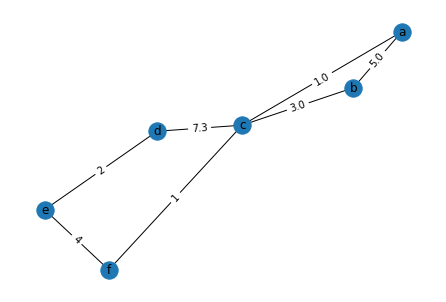

In [25]:
G = nx.Graph()
# G.add_edge(1, 2)  # default edge data=1
# G.add_edge(2, 3, weight=0.9)  # specify edge data

elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3), ('e', 'f', 4), 
         ('d', 'e', 2), ('c', 'f', 1)]
G.add_weighted_edges_from(elist)

print(dir(G))

print(f"Edges: {G.edges}")

print(f"Node: {G.nodes}")



pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
# print(edge_labels)

print(f"Labels: {G.nodes}")
labels = {i:i for i in G.nodes}

nx.draw(G, pos, labels=labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

# nx.draw(G, with_labels = True)
# # plt.savefig("filename.png")
# plt.show()

In [3]:
dir(G)
nx.get_edge_attributes(G, 'weight')
print(G._adj['a'])
G.adj['a']

{'b': {'weight': 5.0}, 'c': {'weight': 1.0}}


AtlasView({'b': {'weight': 5.0}, 'c': {'weight': 1.0}})

In [26]:
def dijkstra(g, source, target):
    nodes = list(g.nodes)
    # Set the distances to inf for each node
    dist = {node: np.inf for node in nodes}
    dist[source] = 0 # Set first node distance to 0
    previous_nodes = {}
    unvisited = nodes.copy()
    path = []
    
    while unvisited:
        current_min_node = None # Check what the current lowest node is of the unvisited nodes
        for node in unvisited:
            if current_min_node == None:
                current_min_node = node
            elif dist[node] < dist[current_min_node]:
                current_min_node = node

        # print(f"Current minimum node: {current_min_node}")
        neighbours = g._adj[current_min_node]
        # neighbours = g[current_min_node]

        for neighbour, weights in neighbours.items():
            # print(weights["weight"])
            # combine the weights of the previous edges and the current edge
            combined_weight = dist[current_min_node] + weights["weight"] 
            # print(combined_weight)
            if dist[neighbour] > combined_weight:
                # Change the total weight of a node if it is smaller then what it currently is
                dist[neighbour] = combined_weight
                # Add the parent node on the path to the current node
                previous_nodes[neighbour] = current_min_node\
                # previous_nodes[neighbour].append(current_min_node)

        unvisited.remove(current_min_node)
                
    print(f"Distance: {dist}")
    print(f"Previous nodes: {previous_nodes}")
            
    if target != "all":
        current_node = target
        while target != source:
            try:
                path.insert(0, target)
                target = previous_nodes[target]
            except KeyError:
                print("Path is not reachable")
                break

        path.insert(0, source)

        print(f"Path: {path}")
    else: # Check for all nodes what the shortest route to the source is.
        paths = {v: {'weight': 0, "path":[]} for v in nodes}
        print(f"Paths: {paths}")
        for node, info in paths.items():
            info["weight"] = dist[node]
            while node != source:
                try:
                    info["path"].insert(0, node)
                    node = previous_nodes[node]
                except KeyError:
                    print("Path is not reachable")
                    break
            info["path"].insert(0, source)
        print(f"Paths: {paths}")

        
        
    
dijkstra(G, 'a', 'f')

{'b': {'weight': 5.0}, 'c': {'weight': 1.0}}
{'b': {'weight': 3.0}, 'a': {'weight': 1.0}, 'd': {'weight': 7.3}, 'f': {'weight': 1}}
{'e': {'weight': 4}, 'c': {'weight': 1}}
{'a': {'weight': 5.0}, 'c': {'weight': 3.0}}
{'f': {'weight': 4}, 'd': {'weight': 2}}
{'c': {'weight': 7.3}, 'e': {'weight': 2}}
Distance: {'a': 0, 'b': 4.0, 'c': 1.0, 'd': 8.0, 'e': 6.0, 'f': 2.0}
Previous nodes: {'b': 'c', 'c': 'a', 'd': 'e', 'f': 'c', 'e': 'f'}
Path: ['a', 'c', 'f']


In [20]:
# try this: https://www.udacity.com/blog/2021/10/implementing-dijkstras-algorithm-in-python.html
# And this video: https://www.youtube.com/watch?v=Ub4-nG09PFw

In [19]:
def dijkstra_algorithm(graph, start_node):

    unvisited_nodes = list(graph.nodes())

 

    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph  

    shortest_path = {}

 

    # We'll use this dict to save the shortest known path to a node found so far

    previous_nodes = {}

 

    # We'll use max_value to initialize the "infinity" value of the unvisited nodes  

    max_value = sys.maxsize

    for node in unvisited_nodes:

        shortest_path[node] = max_value

    # However, we initialize the starting node's value with 0  

    shortest_path[start_node] = 0

   

    # The algorithm executes until we visit all nodes

    while unvisited_nodes:

        # The code block below finds the node with the lowest score

        current_min_node = None

        for node in unvisited_nodes: # Iterate over the nodes

            if current_min_node == None:

                current_min_node = node

            elif shortest_path[node] < shortest_path[current_min_node]:

                current_min_node = node
        # The code block below retrieves the current node's neighbors and updates their distances

        neighbors = graph.get_outgoing_edges(current_min_node)

        for neighbor in neighbors:

            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)

            if tentative_value < shortest_path[neighbor]:

                shortest_path[neighbor] = tentative_value

                # We also update the best path to the current node

                previous_nodes[neighbor] = current_min_node



        # After visiting its neighbors, we mark the node as "visited"

        unvisited_nodes.remove(current_min_node)

   

    return previous_nodes, shortest_path
previous_paths, distances = dijkstra_algorithm(G, start_node = 'a')

AttributeError: 'Graph' object has no attribute 'get_outgoing_edges'

In [6]:
def dijkstra_alg(g, source, target):
    nodes = g.nodes
    n_nodes = len(g.nodes)
    
    visited = [False for i in range(n_nodes)]
    unvisited = list(nodes)
    
    index_source = np.where(np.array(nodes) == source)[0][0]
    print(index_source)
    
    unvisited.insert(0, unvisited.pop(index_source))
    print(unvisited)
    
    dist = {node: np.inf for node in nodes}
    dist[source] = 0
    previous_nodes = {}
    print(f"Distance: {dist}")
    current_node = source
    # Try something like this:
#     while unvisited:
#         if current_node not in unvisited:
              # grab node which is still in the unvisted list with the smallest distance value 
#             current_node = min(upper_bounds, key=upper_bounds.get)
            

    for i, node in enumerate(unvisited[:]):
        print(f"Iteration: {i}, node: {unvisited}, {node}")
        # if node == "a":
        print(G._adj[node])
        smallest_weight = np.inf
        smallest_node = None
        for neighbour, weight in G._adj[node].items():
            print(weight)
            print(f"Node a: {dist[node]}")
            if dist[neighbour] > dist[node] + weight["weight"]:
                dist[neighbour] = weight["weight"]
                previous_nodes[neighbour] = node

            if smallest_weight > weight["weight"]:
                smallest_weight = weight["weight"]
                smallest_node = neighbour

        unvisited.remove(node)
        print(f"Unvisited: {unvisited}")

        index_node = np.where(np.array(unvisited) == smallest_node)[0][0]
        print(index_node)

        unvisited.insert(0, unvisited.pop(index_node))
        print(f"Unvisited: {unvisited}")

        print(smallest_weight)
        print(smallest_node)
        
    print(f"Distances: {dist}")
                

    
    


G._adj["a"]
dijkstra_alg(G, 'a', 'c')
# if 1 not in G:
#     print('hello')
# else:
#     print('In G')

0
['a', 'b', 'c', 'd', 'e', 'f']
Distance: {'a': 0, 'b': inf, 'c': inf, 'd': inf, 'e': inf, 'f': inf}
Iteration: 0, node: ['a', 'b', 'c', 'd', 'e', 'f'], a
{'b': {'weight': 5.0}, 'c': {'weight': 1.0}}
{'weight': 5.0}
Node a: 0
{'weight': 1.0}
Node a: 0
Unvisited: ['b', 'c', 'd', 'e', 'f']
1
Unvisited: ['c', 'b', 'd', 'e', 'f']
1.0
c
Iteration: 1, node: ['c', 'b', 'd', 'e', 'f'], b
{'a': {'weight': 5.0}, 'c': {'weight': 3.0}}
{'weight': 5.0}
Node a: 5.0
{'weight': 3.0}
Node a: 5.0
Unvisited: ['c', 'd', 'e', 'f']
0
Unvisited: ['c', 'd', 'e', 'f']
3.0
c
Iteration: 2, node: ['c', 'd', 'e', 'f'], c
{'b': {'weight': 3.0}, 'a': {'weight': 1.0}, 'd': {'weight': 7.3}, 'f': {'weight': 1}}
{'weight': 3.0}
Node a: 1.0
{'weight': 1.0}
Node a: 1.0
{'weight': 7.3}
Node a: 1.0
{'weight': 1}
Node a: 1.0
Unvisited: ['d', 'e', 'f']


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
nodes = [0, 1, 2, 3, 4, 5]
edges = {(0, 1): 1.0, (0, 2): 1.5, (0,3): 2.0, (1, 3): 0.5, (1, 4): 2.5, (2, 3): 1.5, (3, 5): 1.0}

def dijkstra_test(nodes, edges, source):
    path_lengths = {v: np.inf for v in nodes}
    path_lengths[source] = 0
    
    adjacent_nodes = {v: {} for v in nodes}
    previous_nodes = {v: [] for v in nodes}

    for (u, v), w_uv in edges.items():
        adjacent_nodes[u][v] = w_uv
        adjacent_nodes[v][u] = w_uv
    print(f"adjacent nodes: {adjacent_nodes}")
        
    temporary_nodes = [v for v in nodes]
    # for i in range(4):
    while temporary_nodes:
        upper_bounds = {v:path_lengths[v] for v in temporary_nodes}
        print(upper_bounds)
        u = min(upper_bounds, key=upper_bounds.get)
        print(f"Node: {u}")
        temporary_nodes.remove(u)

        for v, w_uv in adjacent_nodes[u].items():
            print(f"Neighbour: {v}")
            print(f"Min weight: {min(path_lengths[v], path_lengths[u] + w_uv)}")
            print(f"Weight node+neighbour: {path_lengths[u]} + {w_uv} = {path_lengths[u] + w_uv}\n")
            print(f"Path Lengths: {path_lengths}\n")
            path_lengths[v] = min(path_lengths[v], path_lengths[u] + w_uv)


            

    print(temporary_nodes)
    print(path_lengths)
    
dijkstra_test(nodes, edges, 0)

In [ ]:
edges = [(1,2, {'weight':4}),
        (1,3,{'weight':2}),
        (2,3,{'weight':1}),
        (2,4, {'weight':5}),
        (3,4, {'weight':8}),
        (3,5, {'weight':10}),
        (4,5,{'weight':2}),
        (4,6,{'weight':8}),
        (5,6,{'weight':5})]
edge_labels = {(1,2):4, (1,3):2, (2,3):1, (2,4):5, (3,4):8, (3,5):10, (4,5):2, (4,6):8, (5,6):5}
   
        
G = nx.Graph()
for i in range(1,7):
    G.add_node(i)
G.add_edges_from(edges)

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
# print(edge_labels)

print(f"Labels: {G.nodes}")
labels = {i:i for i in G.nodes}

nx.draw(G, pos, labels=labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

# pos = nx.planar_layout(G)
# This will give us all the shortest paths from node 1 using the weights from the edges. 
p1 = nx.shortest_path(G, source="a", weight='weight')

# This will give us the shortest path from node 1 to node 6.
p1to6 = nx.shortest_path(G, source=1, target=6, weight='weight')

# This will give us the length of the shortest path from node 1 to node 6.
length = nx.shortest_path_length(G, source=1, target=6, weight='weight')

print(f"All shortest paths from 1: {p1}")
print(f"Shortest path from 1 to 6: {p1to6}" )
print(f"Length of the shortest path: {length}")